<a href="https://colab.research.google.com/github/hwanid/DevSet4/blob/master/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

size_row    = 28    # height of the image
size_col    = 28    # width of the image

csv_data = np.genfromtxt("mnist.csv", delimiter=',')

label = csv_data[:,0]

image_data = csv_data[:, 1:]

In [0]:
train_label = label[0:1000]
train_image = image_data[0:1000]

test_label = label[1000:]
test_image = image_data[1000:]

In [0]:
def init_theta(input_layer, output_layer):
  return np.random.randn(input_layer, output_layer)

def sigmoid(x):
  output = 1 / (1 + np.exp(-x))
  return output

In [0]:
class NN:
  def __init__(self, train_data, train_label, test_data, test_label):

    self.theta = []
    self.theta.append(init_theta(784, 196))
    self.theta.append(init_theta(196, 49))
    self.theta.append(init_theta(49, 10))

    self.train_data = train_data
    self.test_data = test_data

    num = np.unique(train_label)
    num = num.shape[0]

    train_label_enc = np.eye(num)[train_label.astype(int).tolist()]

    num = np.unique(test_label)
    num = num.shape[0]

    test_label_enc = np.eye(num)[test_label.astype(int).tolist()]

    self.train_label_int = train_label
    self.train_label = train_label_enc

    self.test_label_int = test_label
    self.test_label = test_label_enc


    self.m = train_data.shape[0]
    self.layer_len = len(self.theta)

    self.layers = []
    self.train_loss = []
    self.train_acc = []
    self.test_loss = []
    self.test_acc = []

    self.lda = 0
    self.learning_rate = 1

  def forward(self):

    self.layers = []

    for i in range(self.layer_len):
      if i == 0:
        self.layers.append(sigmoid(np.dot(self.train_data, self.theta[0])))
      else:
        self.layers.append(sigmoid(np.dot(self.layers[i-1], self.theta[i])))

    out = self.layers[-1]
    self.train_loss.append(self.loss_func(self.train_label, out))
    self.train_acc.append(np.mean(np.argmax(out, axis=1) == self.train_label_int))

  def backward(self):

    layer_len = len(self.layers)
    backprop = []

    for i in range(layer_len - 1):
      i = - (i + 1)

      if i == -1:
        backward_a = (self.layers[i] - self.train_label) / self.m
        backprop.append(np.dot(self.layers[i-1].T, backward_a))

      else:
        backward_a = np.multiply(np.dot(backward_a, self.theta[i + 1].T),
                                 (self.layers[i] * (1 - self.layers[i])))
        backprop.insert(0, np.dot(self.layers[i-1].T, backward_a))
    
    backward_a = np.multiply(np.dot(backward_a, self.theta[1].T),
                             self.layers[0] * (1 - self.layers[0]))
    backprop.insert(0, np.dot(self.train_data.T, backward_a))

    for i in range(layer_len):
      self.theta[i] -= self.learning_rate * self.lda * self.theta[i] + self.learning_rate * backprop[i]

      self.layers[i]

  def eval(self):

    for i in range(self.layer_len):
      if i == 0:
        out = sigmoid(np.dot(self.test_data, self.theta[0]))
      else:
        out = sigmoid(np.dot(out, self.theta[i]))
    
    self.output = out
    self.test_loss.append(self.loss_func(self.test_label, out))
    self.test_acc.append(np.mean(np.argmax(out, axis=1) == self.test_label_int))


  def loss_func(self, y, pred_y):

    epsilon = 1e-14

    loss = -y * np.log(pred_y + epsilon) - (1 - y) * np.log(1 - y + epsilon)
    
    s = 0
    n = 0
    for i in range(self.layer_len):
      s += np.sum(self.theta[i]**2)
      n += self.theta[i].shape[0] * self.theta[i].shape[1]
    
    reg = s / (2 * n)

    loss = np.mean(loss) + self.lda * reg

    return loss

In [0]:
model = NN(train_image, train_label, test_image, test_label)

model.learning_rate = 0.8
model.lda = 0.002
for i in range(1000):

  model.forward()
  model.backward()
  model.eval()

Plot the loss curve

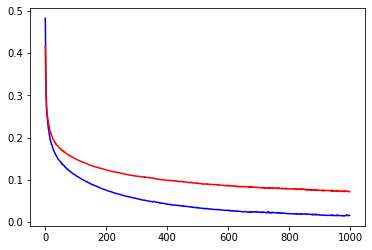

In [8]:
plt.plot(model.train_loss[1:], c='blue')
plt.plot(model.test_loss[1:], c='red')

Plot the accuracy curve

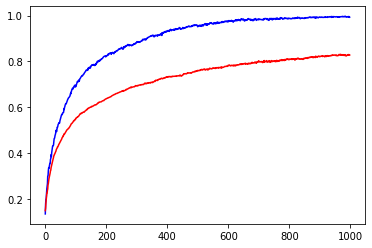

In [9]:
plt.plot(model.train_acc[1:], c='blue')
plt.plot(model.test_acc[1:], c='red')

Final accuracy value

In [10]:
print('train >> ', model.train_acc[-1] * 100)
print('test  >> ', model.test_acc[-1] * 100)

train >>  99.3
test  >>  82.77777777777777


In [0]:
result = (np.argmax(model.output, axis=1) == test_label)
pred = np.argmax(model.output, axis=1)
correct = np.where(result == True)
wrong = np.where(result == False)

Plot the classification example

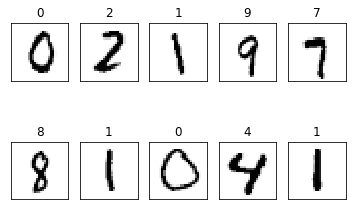

In [33]:
for i in range(10):

    plt.subplot(2, 5, i+1)
    plt.title(int(pred[correct[0][i]]))
    plt.imshow(test_image[correct[0][i]].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

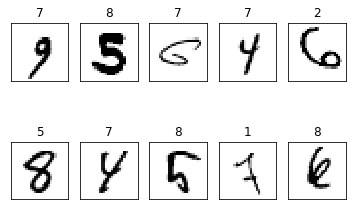

In [34]:
for i in range(10):

    plt.subplot(2, 5, i+1)
    plt.title(int(pred[wrong[0][i]]))
    plt.imshow(test_image[wrong[0][i]].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)